In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os  
import pandas as pd
import seaborn as sns
import time

In [18]:
sns.set_theme(style="whitegrid", palette=sns.husl_palette(l=.4, n_colors=9), font_scale=1.8, context="paper")

# Scoring: `T1`

In [19]:
################
dataset = "T1"
################

path_BASE = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/{dataset}"

datasetTimepoint = "12_sterol_discoveryValidation_corrected"
target = "disease_severity"
#### Feature selection:
vars = "iterativeBoruta"    # boruta+bestSterols
varPath = f"{path_BASE}/results/featureSelection/{datasetTimepoint}/{vars}.txt"
sel_variables = pd.read_csv(varPath, header=None)[0].tolist()
path_results = f"{path_BASE}/results/prediction/featureSelection/{datasetTimepoint}/{vars}/modelComparison/zigaPipeline"

folderFigures =  f"../figures/{dataset}"
os.makedirs(folderFigures, exist_ok=True)

In [20]:
sns.husl_palette(l=.4, n_colors=3)

[(0.7068574918274737, 0.11027871818526241, 0.2747061222663145),
 (0.17705545280426335, 0.4169982861326329, 0.10112016988851782),
 (0.12675667510032929, 0.38336665224260497, 0.564172135389151)]

/tmp/ipykernel_1696694/2717178216.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scoring["model"][df_scoring["model"] == "gpr"] = "gpc" ### Fix one model name


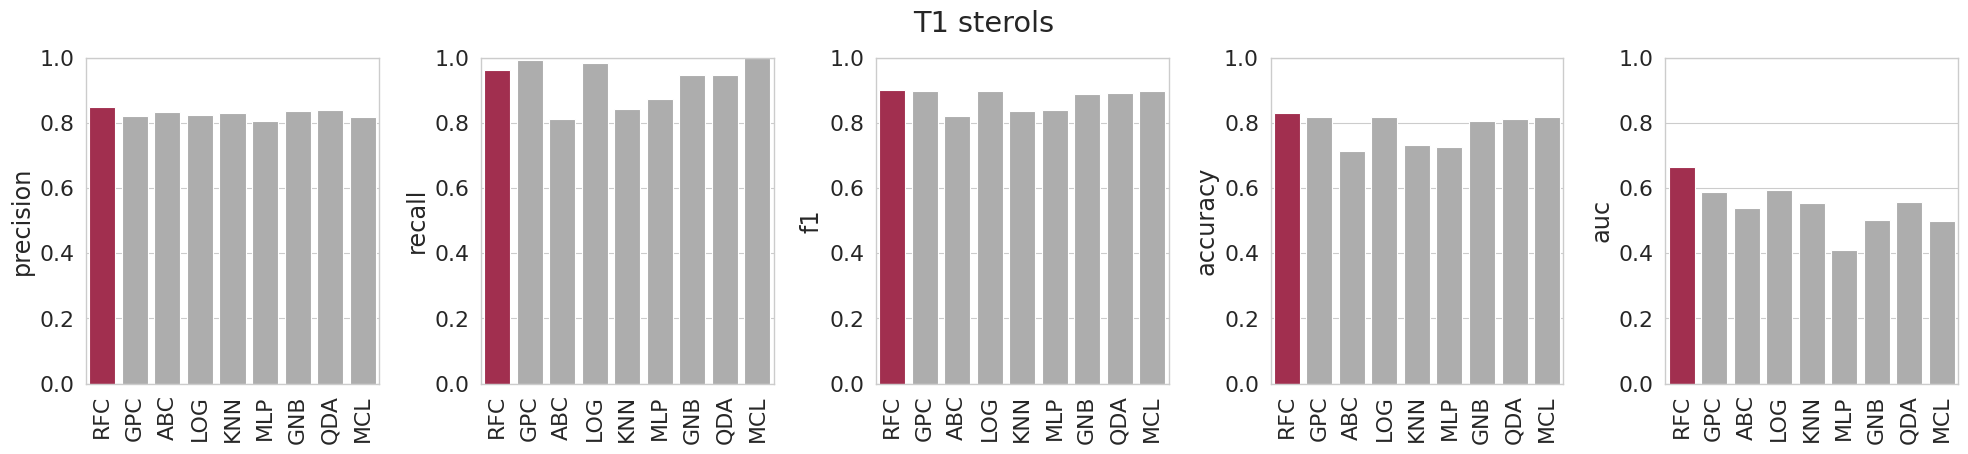

In [21]:
''' Load data'''
dataframes_before = {}
dataframes_after = {} 
dataframes_features = {} 
dataframes_importances = {} 

models = ['rfc', 'gpr', 'abc','log', 'knn', 'mlp', 'gnb', 'qda', 'mcl'] #'svc'

df_scoring = pd.DataFrame()
for model in models:
    df = pd.read_csv(path_results+f"/prediction_cv_test_{model}.csv")   
    df_scoring = pd.concat([df_scoring, df], axis=0)

df_scoring.to_csv(f"{folderFigures}/LOOCV_modelComparison_scoring.csv", index=False)
df_scoring

''' Plot '''
c = [sns.husl_palette(l=.4, n_colors=3)[0]] + 8*[sns.color_palette("Greys")[2]]
fig, axs = plt.subplots(1,5, figsize=(20,5))
df_scoring["model"][df_scoring["model"] == "gpr"] = "gpc" ### Fix one model name
df_scoring_plot = df_scoring.melt("model")
for ax, metric in zip(axs, df_scoring.drop("model", axis=1).columns.tolist()):
    df = df_scoring_plot[df_scoring_plot["variable"] == metric]
    sns.barplot(data=df, x="model", y="value", palette=c, ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel("")
    ax.set_ylabel(metric)
    ax.set_ylim(0,1)
    ax.set_xticklabels(list(map(str.upper,df_scoring["model"])))
fig.suptitle("T1 sterols", y=0.92)
plt.tight_layout() 
fig.savefig(f"../figures/comparisonModels_{dataset}.png", dpi=300)

In [22]:

list(map(str.upper,df_scoring["model"]))

['RFC', 'GPC', 'ABC', 'LOG', 'KNN', 'MLP', 'GNB', 'QDA', 'MCL']

In [23]:
df_scoring.index=df_scoring["model"]
df_scoring_bestModel = df_scoring.drop(["model"], axis=1)
df_scoring_bestModel.idxmax()

precision    rfc
recall       mcl
f1           rfc
accuracy     rfc
auc          rfc
dtype: object

In [24]:
df_scoring

,precision,recall,f1,accuracy,model,auc
model,,,,,,
rfc,0.848684,0.962687,0.902098,0.829268,rfc,0.663682
gpc,0.820988,0.992537,0.898649,0.817073,gpc,0.587313
abc,0.832061,0.813433,0.822642,0.713415,abc,0.540050
log,0.825000,0.985075,0.897959,0.817073,log,0.594776
knn,0.830882,0.843284,0.837037,0.731707,knn,0.555473
mlp,0.806897,0.873134,0.838710,0.725610,mlp,0.410448
gnb,0.835526,0.947761,0.888112,0.804878,gnb,0.500746
qda,0.841060,0.947761,0.891228,0.810976,qda,0.557214
mcl,0.817073,1.000000,0.899329,0.817073,mcl,0.500000


# Scoring: `clinical`

In [25]:
################
dataset = "clinical"
################

path_BASE = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/{dataset}"

datasetTimepoint = "12_uponAdmission"
target = "disease_severity"
#### Feature selection:
vars = "boruta"    # boruta+bestSterols
varPath = f"{path_BASE}/results/featureSelection/{datasetTimepoint}/{vars}.txt"
sel_variables = pd.read_csv(varPath, header=None)[0].tolist()
path_results = f"{path_BASE}/results/prediction/featureSelection/{datasetTimepoint}/{vars}/modelComparison/zigaPipeline"

folderFigures =  f"../figures/{dataset}"
os.makedirs(folderFigures, exist_ok=True)

/tmp/ipykernel_1696694/1093213524.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scoring["model"][df_scoring["model"] == "gpr"] = "gpc" ### Fix one model name


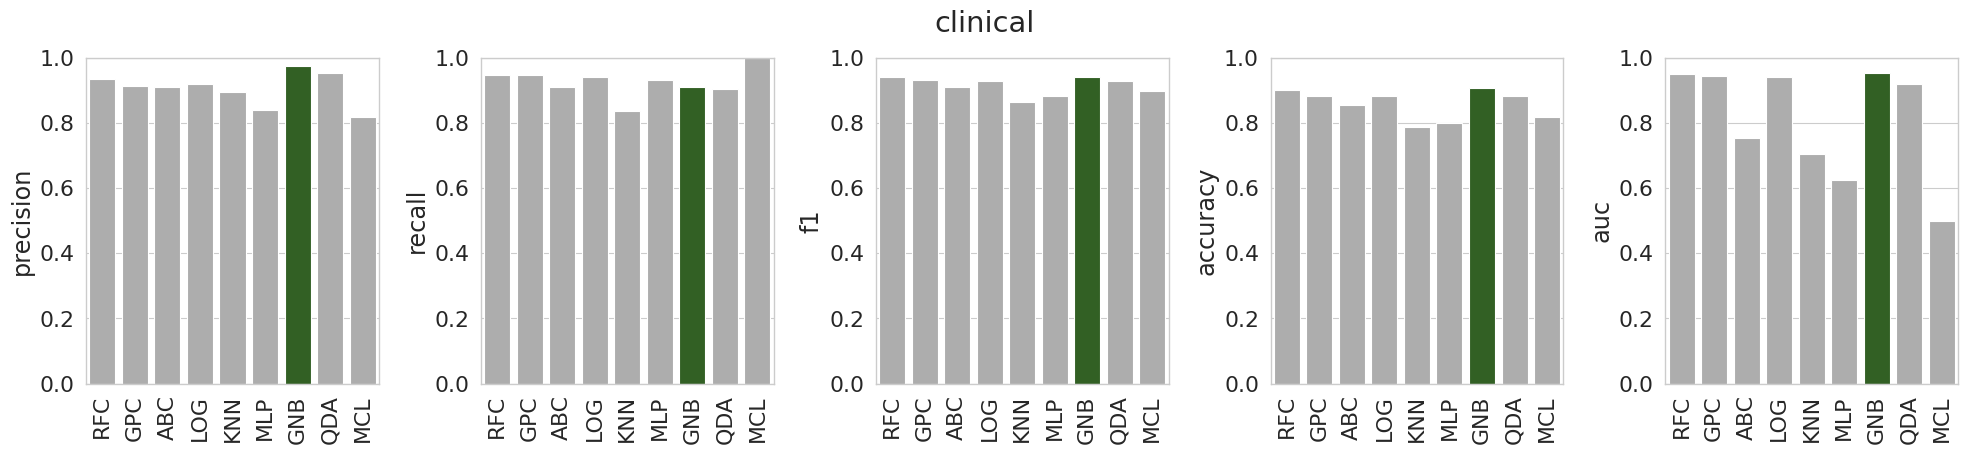

In [26]:
''' Load data'''
dataframes_before = {}
dataframes_after = {} 
dataframes_features = {} 
dataframes_importances = {} 

models = ['rfc', 'gpr', 'abc','log', 'knn', 'mlp', 'gnb', 'qda', 'mcl'] #'svc'

df_scoring = pd.DataFrame()
for model in models:
    df = pd.read_csv(path_results+f"/prediction_cv_test_{model}.csv")   
    df_scoring = pd.concat([df_scoring, df], axis=0)

df_scoring.to_csv(f"{folderFigures}/LOOCV_modelComparison_scoring.csv", index=False)
df_scoring

''' Plot '''
c = 6*[sns.color_palette("Greys")[2]] + [sns.husl_palette(l=.4, n_colors=3)[1]] + 2*[sns.color_palette("Greys")[2]]
fig, axs = plt.subplots(1,5, figsize=(20,5))
df_scoring["model"][df_scoring["model"] == "gpr"] = "gpc" ### Fix one model name
df_scoring_plot = df_scoring.melt("model")
for ax, metric in zip(axs, df_scoring.drop("model", axis=1).columns.tolist()):
    df = df_scoring_plot[df_scoring_plot["variable"] == metric]
    sns.barplot(data=df, x="model", y="value", palette=c, ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel("")
    ax.set_ylabel(metric)
    ax.set_ylim(0,1)
    ax.set_xticklabels(list(map(str.upper,df_scoring["model"])))
fig.suptitle("clinical", y=0.92)
plt.tight_layout() 
fig.savefig(f"../figures/comparisonModels_{dataset}.png", dpi=300)

In [27]:
df_scoring

,precision,recall,f1,accuracy,model,auc
0,0.933824,0.947761,0.940741,0.902439,rfc,0.949005
0,0.913669,0.947761,0.930403,0.884146,gpc,0.944279
0,0.910448,0.910448,0.910448,0.853659,abc,0.755224
0,0.919708,0.940299,0.929889,0.884146,log,0.942289
0,0.896000,0.835821,0.864865,0.786585,knn,0.705846
0,0.838926,0.932836,0.883392,0.798780,mlp,0.625373
0,0.976000,0.910448,0.942085,0.908537,gnb,0.954726
0,0.952756,0.902985,0.927203,0.884146,qda,0.919900
0,0.817073,1.000000,0.899329,0.817073,mcl,0.500000


In [28]:
df_scoring.index=df_scoring["model"]
df_scoring_bestModel = df_scoring.drop(["model"], axis=1)
df_scoring_bestModel.idxmax()

precision    gnb
recall       mcl
f1           gnb
accuracy     gnb
auc          gnb
dtype: object

# Scoring: `clinical+T1`

In [29]:
################
dataset = "clinical_T1"
################

path_BASE = f"/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/{dataset}"

datasetTimepoint = "12_uponAdmission"
target = "disease_severity"
#### Feature selection:
vars = "clinical+bestSterols"    # boruta+bestSterols
varPath = f"{path_BASE}/results/featureSelection/{datasetTimepoint}/{vars}.txt"
sel_variables = pd.read_csv(varPath, header=None)[0].tolist()
path_results = f"{path_BASE}/results/prediction/featureSelection/{datasetTimepoint}/{vars}/modelComparison/zigaPipeline"

folderFigures =  f"../figures/{dataset}"
os.makedirs(folderFigures, exist_ok=True)

/tmp/ipykernel_1696694/97951903.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scoring["model"][df_scoring["model"] == "gpr"] = "gpc" ### Fix one model name


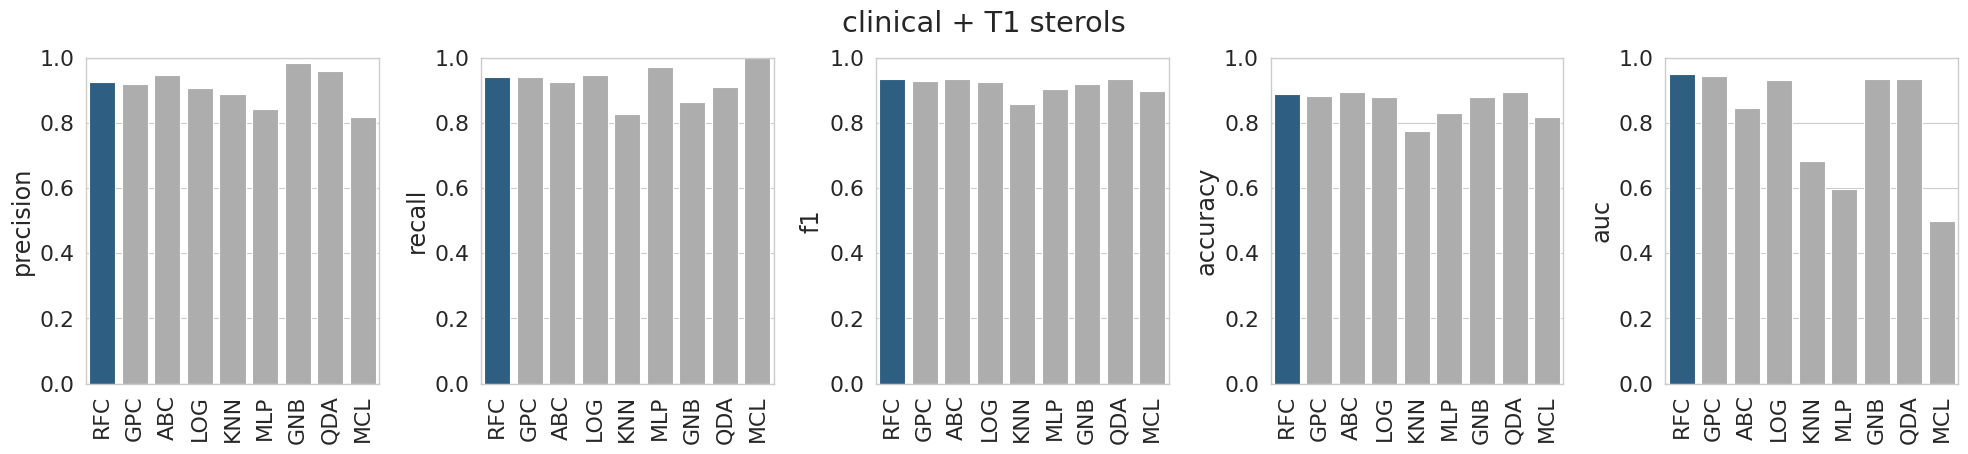

In [30]:
''' Load data'''
dataframes_before = {}
dataframes_after = {} 
dataframes_features = {} 
dataframes_importances = {} 

models = ['rfc', 'gpr', 'abc','log', 'knn', 'mlp', 'gnb', 'qda', 'mcl'] #'svc'

df_scoring = pd.DataFrame()
for model in models:
    df = pd.read_csv(path_results+f"/prediction_cv_test_{model}.csv")   
    df_scoring = pd.concat([df_scoring, df], axis=0)

df_scoring.to_csv(f"{folderFigures}/LOOCV_modelComparison_scoring.csv", index=False)
df_scoring

''' Plot '''
c = [sns.husl_palette(l=.4, n_colors=3)[2]] + 8*[sns.color_palette("Greys")[2]]
fig, axs = plt.subplots(1,5, figsize=(20,5))
df_scoring["model"][df_scoring["model"] == "gpr"] = "gpc" ### Fix one model name
df_scoring_plot = df_scoring.melt("model")
for ax, metric in zip(axs, df_scoring.drop("model", axis=1).columns.tolist()):
    df = df_scoring_plot[df_scoring_plot["variable"] == metric]
    sns.barplot(data=df, x="model", y="value", palette=c, ax=ax)
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel("")
    ax.set_ylabel(metric)
    ax.set_ylim(0,1)
    ax.set_xticklabels(list(map(str.upper,df_scoring["model"])))
fig.suptitle("clinical + T1 sterols", y=0.92)
plt.tight_layout() 
fig.savefig(f"../figures/comparisonModels_{dataset}.png", dpi=300)

In [31]:
df_scoring

,precision,recall,f1,accuracy,model,auc
0,0.926471,0.940299,0.933333,0.890244,rfc,0.949502
0,0.919708,0.940299,0.929889,0.884146,gpc,0.944527
0,0.946565,0.925373,0.935849,0.896341,abc,0.846020
0,0.907143,0.947761,0.927007,0.878049,log,0.933085
0,0.888000,0.828358,0.857143,0.774390,knn,0.683458
0,0.844156,0.970149,0.902778,0.829268,mlp,0.596020
0,0.983051,0.865672,0.920635,0.878049,gnb,0.934826
0,0.960630,0.910448,0.934866,0.896341,qda,0.934826
0,0.817073,1.000000,0.899329,0.817073,mcl,0.500000


In [32]:
df_scoring.index=df_scoring["model"]
df_scoring_bestModel = df_scoring.drop(["model"], axis=1)
df_scoring_bestModel.idxmax()

precision    gnb
recall       mcl
f1           abc
accuracy     abc
auc          rfc
dtype: object